In [1]:
import pandas as pd
import numpy as np
import re

import plotly.express as px
import ipywidgets as widgets

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

In [2]:
meta = pd.read_csv("./input_folder/merged/meta_final2.tsv", sep = "\t", index_col = 0)
rename_to = {v: k for k, v in meta["old_name"].to_dict().items()}

categories = ["Top", "Middle", "Bottom"]

# Convert the Series to Categorical with custom categories
meta["depthlayer"] = pd.Categorical(meta["depthlayer"], categories=categories, ordered=True)

meta.sort_values("depthlayer", inplace = True)

In [3]:
path = "input_folder/KS/16S_predicted.tsv.gz"
df = pd.read_csv(path, compression="gzip", header=0, sep="\t", index_col = 0)
df.sort_values("16S_rRNA_Count", ascending = False, inplace = True)

In [4]:
taxo = pd.read_csv("input_folder/KS/taxonomy.tsv", sep = "\t", index_col = 0)

## Taxonomy with NSTI value above 2

In [5]:
a = pd.DataFrame(
    taxo.loc[
            df.loc[df["metadata_NSTI"] > 2, :].index.tolist(), :
        ].value_counts("Taxon")
)

a.columns = ["Number of ASVs"]
a = a.loc[sorted(a.index.tolist()), :]
a.head()

,Number of ASVs
Taxon,
d__Archaea,3
d__Archaea; p__Aenigmarchaeota; c__Aenigmarchaeia; o__Aenigmarchaeales; f__Aenigmarchaeales; g__Aenigmarchaeales; s__uncultured_archaeon,4
d__Archaea; p__Aenigmarchaeota; c__Aenigmarchaeia; o__Aenigmarchaeales; f__Aenigmarchaeales; g__Candidatus_Aenigmarchaeum; s__uncultured_archaeon,2
d__Archaea; p__Crenarchaeota; c__Bathyarchaeia; o__Bathyarchaeia; f__Bathyarchaeia; g__Bathyarchaeia; s__uncultured_archaeon,1
d__Archaea; p__Nanoarchaeota; c__Nanoarchaeia; o__Woesearchaeales; f__GW2011_GWC1_47_15; g__GW2011_GWC1_47_15; s__uncultured_archaeon,1


In [6]:
a["Tax"] = [re.sub("; o__.*", "", i) for i in a.index.tolist()]
a.groupby("Tax").sum()

,Number of ASVs
Tax,
d__Archaea,3
d__Archaea; p__Aenigmarchaeota; c__Aenigmarchaeia,6
d__Archaea; p__Crenarchaeota; c__Bathyarchaeia,1
d__Archaea; p__Nanoarchaeota; c__Nanoarchaeia,14
d__Bacteria,1
d__Bacteria; p__Patescibacteria,4
d__Bacteria; p__Patescibacteria; c__ABY1,2
d__Bacteria; p__Patescibacteria; c__Microgenomatia,3
d__Bacteria; p__Patescibacteria; c__Parcubacteria,8


## Data transformation+ordination on predicted functions (Kegg Ontology)
### KS samples only

In [7]:
bray_pca_df = pd.read_csv("input_folder/KS/functional_metagenome/KO/bray_pca.tsv", sep = "\t")
metadata_dropdown_bray_pca = widgets.Dropdown(options=list(meta.columns), description='Select Metadata:')

def update_color_bray_pca(selected_metadata):
    fig = px.scatter_3d(bray_pca_df, x='PC1', y='PC2', z = "PC3",
                     color = selected_metadata,
                     text='uniqID', title='Bray Curtis + PCA Analysis on predicted KO')
    fig.update_traces(textposition='top center')
    fig.update_layout(width = 800, height = 800)
    fig.show()

# Observe the changes and update the plot on metadata selection
widgets.interactive(update_color_bray_pca, selected_metadata=metadata_dropdown_bray_pca)

interactive(children=(Dropdown(description='Select Metadata:', options=('uniqID', 'filename_prefix', 'temperat…

In [8]:
metadata_dropdown_bray_pca = widgets.Dropdown(options=list(meta.columns),
                                              description='Select Metadata:')

def update_color_bray_pca(selected_metadata):
    fig = px.scatter(bray_pca_df, x='PC1', y='PC2',
                     color = selected_metadata,
                     text='uniqID', title='Bray Curtis + PCA Analysis on predicted KO')
    fig.update_traces(textposition='top center')
    fig.update_layout(width = 800, height = 800)
    fig.show()

# Observe the changes and update the plot on metadata selection
widgets.interactive(update_color_bray_pca, selected_metadata=metadata_dropdown_bray_pca)

interactive(children=(Dropdown(description='Select Metadata:', options=('uniqID', 'filename_prefix', 'temperat…

### Merged samples

In [9]:
bray_pca_df = pd.read_csv("input_folder/merged/functional_metagenome/KO/bray_pca.tsv", sep = "\t")
metadata_dropdown_bray_pca = widgets.Dropdown(options=list(meta.columns), description='Select Metadata:')

def update_color_bray_pca(selected_metadata):
    fig = px.scatter_3d(bray_pca_df, x='PC1', y='PC2', z = "PC3",
                     color = selected_metadata,
                     text='uniqID', title='Bray Curtis + PCA Analysis on predicted KO')
    fig.update_traces(textposition='top center')
    fig.update_layout(width = 1000, height = 800)
    fig.show()

# Observe the changes and update the plot on metadata selection
widgets.interactive(update_color_bray_pca, selected_metadata=metadata_dropdown_bray_pca)

interactive(children=(Dropdown(description='Select Metadata:', options=('uniqID', 'filename_prefix', 'temperat…

In [10]:
metadata_dropdown_bray_pca = widgets.Dropdown(options=list(meta.columns),
                                              description='Select Metadata:')

def update_color_bray_pca(selected_metadata):
    fig = px.scatter(bray_pca_df, x='PC1', y='PC2',
                     color=selected_metadata,
                     text='uniqID', title='Bray Curtis + PCA Analysis on predicted KO')
    fig.update_traces(textposition='top center')

    # Set the aspect ratio (width:height) as desired, e.g., 1:1
    aspect_ratio = 0.6
    fig.update_layout(width=1200, height=1200 * aspect_ratio)

    fig.show()

# Observe the changes and update the plot on metadata selection
widgets.interactive(update_color_bray_pca, selected_metadata=metadata_dropdown_bray_pca)

interactive(children=(Dropdown(description='Select Metadata:', options=('uniqID', 'filename_prefix', 'temperat…

## Subset methane metabolism from predicted functions (KO)

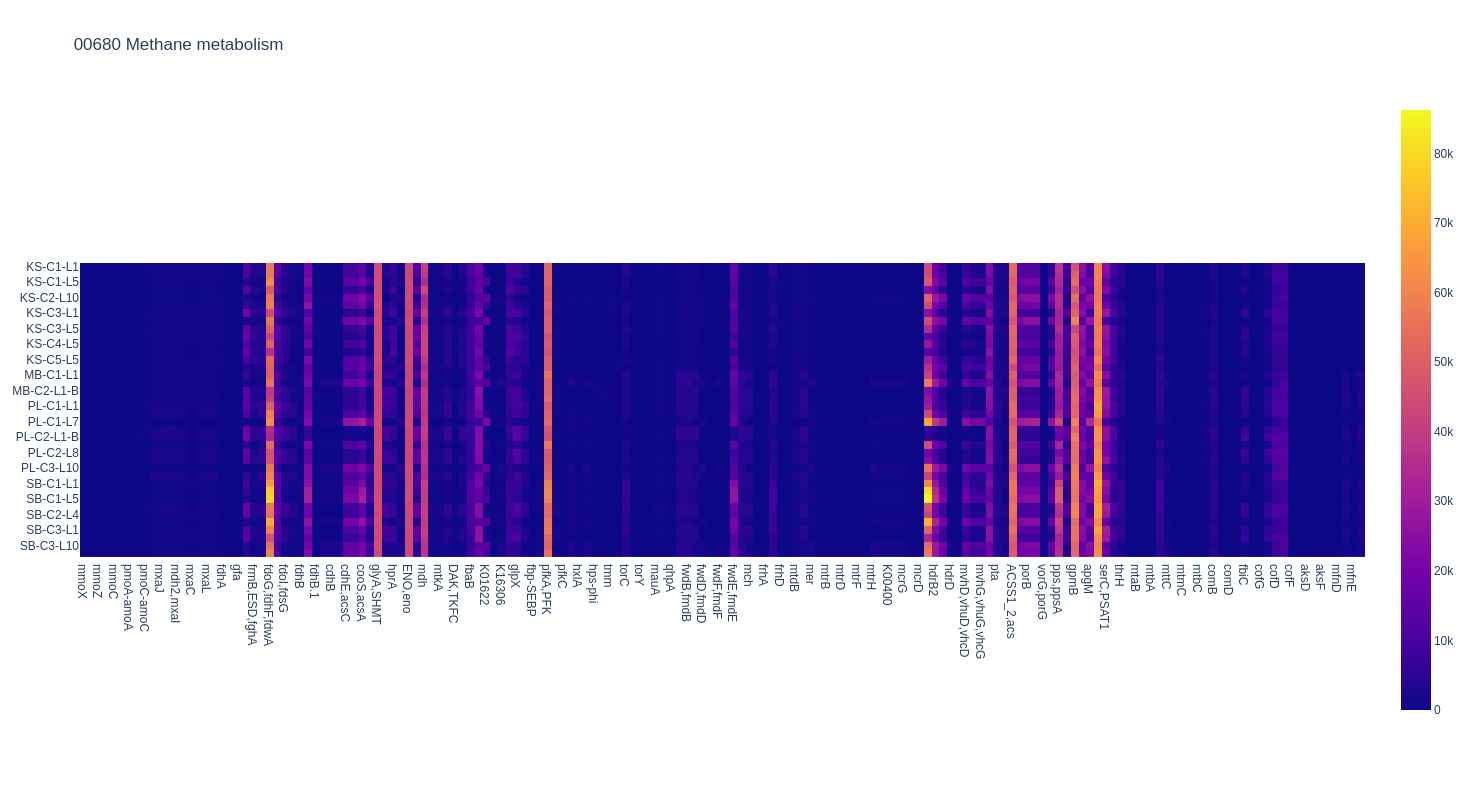

In [11]:
sub_df = pd.read_csv("input_folder/subset_methane_metabolism.tsv", sep = "\t", index_col = 0)
fig = px.imshow(sub_df, title = "00680 Methane metabolism")
fig.update_layout(height = 800)
fig.show()

### Some of the values in the heatmap are too high (80k), a lot of other things look blue, even values around 3k (see below).

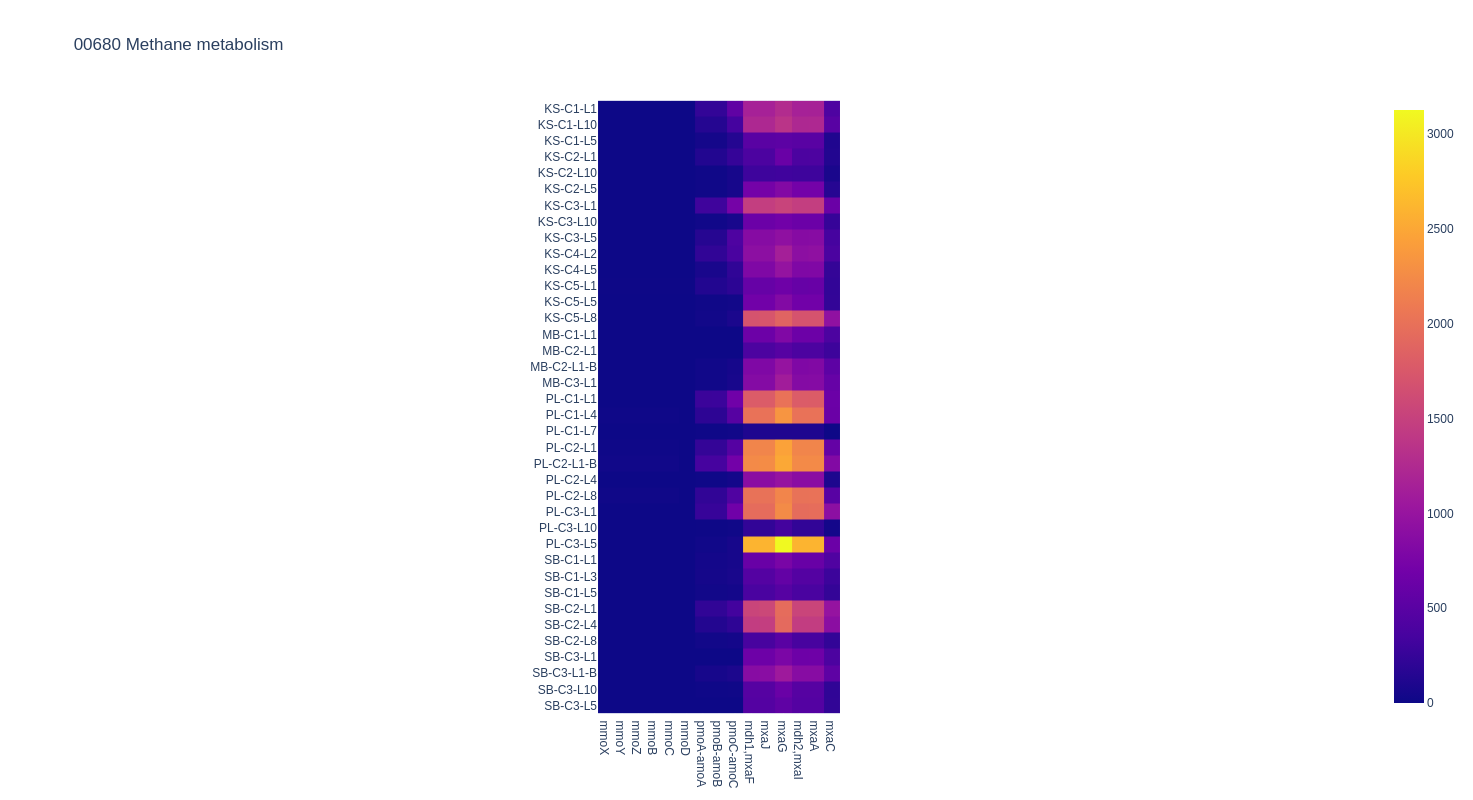

In [14]:
sub_df = pd.read_csv("input_folder/subset_methane_metabolism.tsv", sep = "\t", index_col = 0)
sub_df = sub_df.loc[:, sub_df.columns.tolist()[:15]]
fig = px.imshow(sub_df, title = "00680 Methane metabolism")
fig.update_layout(height = 800)
fig.show()